In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import eli5

import regex as re
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import learning_curve

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier

from nltk.corpus import stopwords

import pickle
import sys

import warnings
warnings.filterwarnings('ignore')
# warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# df_reddit = pickle.load(open('../DataSet/df_reddit_for_model.pkl', 'rb'))
df_reddit = pickle.load(open('../DataSet/df_reddit_for_model.pkl', 'rb'))
EDA_df = pickle.load(open('../DataSet/EDA_all_for_model.pkl', 'rb'))
# df_reddit['target'] = df_reddit['subreddit'].replace({"NASA": 1, "Space_discussion": 0})
df_reddit.head(2)

,ent,text_merged,word_count*,sentiment_score*,target,polarity_score,polarity,polarity_VSA,lower_sent,tagged_sent,text_complexity
0,1,star shine saturn ring,4,0.0,1,0.0,1,1,star shine saturn ring,"[(star, NN), (shine, NN), (saturn, NN), (ring,...",92.80
1,2,smithsonian nation air space museum,5,0.0,1,0.0,1,1,smithsonian nation air space museum,"[(smithsonian, JJ), (nation, NN), (air, NN), (...",15.64


In [3]:
EDA_df.head(2)

,target,'',CC,CD,DT,EX,FW,IN,JJ,JJR,...,WP,WP$,WRB,ent,word_count*,sentiment_score*,polarity_score,polarity,polarity_VSA,text_complexity
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,4,0.0,0.0,1,1,92.80
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2,5,0.0,0.0,1,1,15.64


Defining X and Y variables and use train test split function

In [4]:
X = df_reddit['text_merged']
y = df_reddit['target']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    stratify=y,
                                                    random_state = 101)

In [5]:
cvec = CountVectorizer(min_df=4, max_df=1.0,
                       ngram_range=(1,2),max_features = 3000)

term_mat = cvec.fit_transform(df_reddit['text_merged'])

term_df = pd.DataFrame(term_mat.toarray(), 
                       columns=cvec.get_feature_names())

term_df.head(2)

,aa,ab,abil,abl,abl see,aboard,aboard intern,aboard space,abort,abort test,...,york,youlikebet,young,youtu,zealand,zero,zero graviti,zone,zoom,zubrin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Merge two base DFs and apply ML algorithms

In [6]:
EDA_df.head(2)

,target,'',CC,CD,DT,EX,FW,IN,JJ,JJR,...,WP,WP$,WRB,ent,word_count*,sentiment_score*,polarity_score,polarity,polarity_VSA,text_complexity
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,4,0.0,0.0,1,1,92.80
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2,5,0.0,0.0,1,1,15.64


In [7]:
for col in EDA_df.columns:
    if col == 'target':
        print(col)


target


In [8]:
EDA_df.columns

Index(['target', '''', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS',
       'MD', 'NN', 'NNP', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR',
       'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ',
       'WDT', 'WP', 'WP$', 'WRB', 'ent', 'word_count*', 'sentiment_score*',
       'polarity_score', 'polarity', 'polarity_VSA', 'text_complexity'],
      dtype='object')

In [9]:
term_df.head(2)

,aa,ab,abil,abl,abl see,aboard,aboard intern,aboard space,abort,abort test,...,york,youlikebet,young,youtu,zealand,zero,zero graviti,zone,zoom,zubrin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# for col in term_df.columns:
#     if col == 'target':
#         print(col)
term_df = term_df.drop(columns = ['target'])

In [11]:
All_DF =  pd.concat([EDA_df, term_df], axis=1)
All_DF.head(2)

,target,'',CC,CD,DT,EX,FW,IN,JJ,JJR,...,york,youlikebet,young,youtu,zealand,zero,zero graviti,zone,zoom,zubrin
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
All_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Columns: 3042 entries, target to zubrin
dtypes: float64(38), int64(3004)
memory usage: 278.5 MB


Seperate the target value and turn it to array and use train test split function.

In [13]:
y2 = All_DF['target']
X2 = All_DF.drop(columns = ['target'])

X_arr2 = np.array(X2)
y_arr2 = np.array(y2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_arr2,
                                                        y_arr2,
                                                        test_size = 0.25,
                                                        random_state = 101)

#### Logistic Regression
Run the Logistic Regression model

In [14]:
lr = LogisticRegression(solver='sag', max_iter=1000, 
                        verbose=2, n_jobs=-1)

lr.fit(X_train2, y_train2);

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


max_iter reached after 216 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.6min finished


train score 0.834
test score 0.8286666666666667


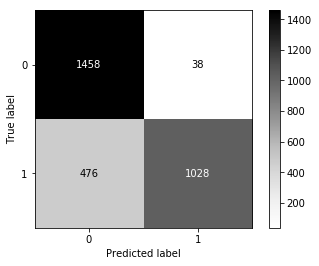

In [15]:
lr.score(X_train2, y_train2); 
print('train score', lr.score(X_train2, y_train2))

lr.score(X_test2, y_test2); 
print('test score', lr.score(X_test2, y_test2))

preds = lr.predict(X_test2)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test2, preds).ravel()

# View confusion matrix

plot_confusion_matrix(lr, X_test2, y_test2, 
                      cmap='Greys', values_format='d');
Accuracy = (tp + tn) / (tp + tn + fp + fn)
Precision = tp / (tp + fp)
Recall = tp / (tp + fn)

Accuracy, Precision, Recall
plt.savefig("../Figures/plot_04_02_1.png")

Save the lr model.

In [16]:
# save the model to disk
sys.path.insert(1, '../Codes/')
filename = '../Codes/Models/lr_All_DF_P04_02.sav'
pickle.dump(lr, open(filename, 'wb'))

#### ANN Grid Search with all CPUs

In [17]:
mlp = MLPClassifier(hidden_layer_sizes=50, activation='relu', solver='adam', 
                    alpha=0.0001, batch_size='auto', learning_rate='constant', 
                    learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
                    random_state=None, tol=0.0001, verbose=False, warm_start=False, 
                    momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
                    validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                    n_iter_no_change=10, max_fun=15000)


mlp_params = {
    'hidden_layer_sizes': [100,150],
    'activation': ['tanh', 'relu']}
mlp = GridSearchCV(mlp, param_grid=mlp_params, cv=3, 
                   verbose=1, n_jobs=-1)
mlp.fit(X_train2, y_train2)

print(mlp.best_score_)
mlp.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits
0.8428888888888889


{'activation': 'relu', 'hidden_layer_sizes': 150}

#### ANN model

In [18]:
estimator = MLPClassifier(hidden_layer_sizes=100, activation='relu', solver='adam', 
                    alpha=0.0001, batch_size='auto', learning_rate='constant', 
                    learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
                    random_state=None, tol=0.0001, verbose=False, warm_start=False, 
                    momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
                    validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                    n_iter_no_change=10, max_fun=15000)

X = X_train2
y = y_train2

train_sizes, train_scores, test_scores, fit_times, _ =\
                                       learning_curve(estimator, X, y, scoring='accuracy',
                                                      cv=3, n_jobs=-1,
                                                      train_sizes=np.linspace(.1, 1.0, 5),
                                                      return_times=True)


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

Plot the learning curve.

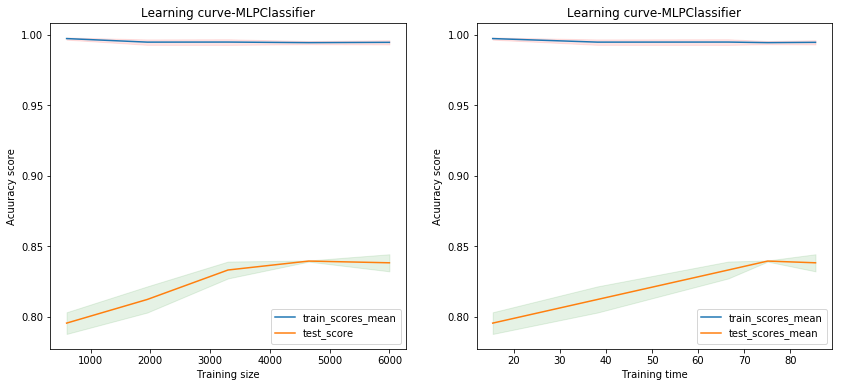

In [19]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(train_sizes, train_scores_mean, label='train_scores_mean')
plt.fill_between(train_sizes, train_scores_mean-train_scores_std, 
                 train_scores_mean+train_scores_std, alpha=0.1,
                         color="r")


plt.plot(train_sizes, test_scores_mean, label='test_score')
plt.fill_between(train_sizes, test_scores_mean-test_scores_std, 
                 test_scores_mean+test_scores_std, alpha=0.1,
                         color="g")

# plt.ylim(0,1)
plt.title('Learning curve-MLPClassifier')
plt.ylabel('Acuuracy score')
plt.xlabel('Training size')
plt.legend(loc='best')

plt.subplot(1,2,2)
# plt.figure(figsize=(8,6))
plt.plot(fit_times_mean,train_scores_mean, label='train_scores_mean')
plt.fill_between(fit_times_mean, train_scores_mean-train_scores_std, 
                 train_scores_mean+train_scores_std, alpha=0.1,
                         color="r")
plt.plot(fit_times_mean,test_scores_mean, label='test_scores_mean')
plt.fill_between(fit_times_mean, test_scores_mean-test_scores_std, 
                 test_scores_mean+test_scores_std, alpha=0.1,
                         color="g")
# plt.ylim(0.5,1.1)
plt.title('Learning curve-MLPClassifier')
plt.ylabel('Acuuracy score')
plt.xlabel('Training time')
plt.legend(loc='lower right')
plt.savefig("../Figures/plot_04_02_2.png")

Save the ANN model.

In [20]:
# save the model to disk
sys.path.insert(1, '../Codes/')
filename = '../Codes/Models/mlp_relu_adam_150_P04_02.sav'
pickle.dump(mlp, open(filename, 'wb'))

### GBoost Grid Search with all CPUs

### The grid search for gboost algorithm was ran and the results were provided below.
```python
gboost = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, 
                                    n_estimators=100, subsample=1.0, criterion='friedman_mse', 
                                    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                    max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, 
                                    init=None, random_state=None, max_features=None, verbose=0, 
                                    max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, 
                                    n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
gboost_params = {
    'max_depth': [2,3,4],
    'n_estimators': [100, 250, 500],
    'learning_rate': [.08, .1, .12]
}
gs = GridSearchCV(gboost, param_grid=gboost_params, 
                  cv=3, verbose=1, n_jobs=-1)
gs.fit(X_train2, y_train2)

print(gs.best_score_)
gs.best_params_
```

### Results

```
Fitting 3 folds for each of 27 candidates, totalling 81 fits
0.8782222222222223
{'learning_rate': 0.08, 'max_depth': 4, 'n_estimators': 500}
```



going with the best gboost parameters as follow.

In [ ]:
estimator = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, 
                                    n_estimators=100, subsample=1.0, criterion='friedman_mse', 
                                    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                    max_depth=6, min_impurity_decrease=0.0, min_impurity_split=None, 
                                    init=None, random_state=None, max_features=None, verbose=True, 
                                    max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, 
                                    n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

X = X_train2
y = y_train2

train_sizes, train_scores, test_scores, fit_times, _ =\
                                       learning_curve(estimator, X, y, scoring='accuracy',
                                                      cv=3, n_jobs=-1,
                                                      train_sizes=np.linspace(.1, 1.0, 5),
                                                      return_times=True)


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

Plot the learning curve.

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(train_sizes, train_scores_mean, label='train_scores_mean')
plt.fill_between(train_sizes, train_scores_mean-train_scores_std, 
                 train_scores_mean+train_scores_std, alpha=0.1,
                         color="r")


plt.plot(train_sizes, test_scores_mean, label='test_score')
plt.fill_between(train_sizes, test_scores_mean-test_scores_std, 
                 test_scores_mean+test_scores_std, alpha=0.1,
                         color="g")

# plt.ylim(0,1)
plt.title('Learning curve-GradientBoostingClassifier')
plt.ylabel('Acuuracy score')
plt.xlabel('Training size')
plt.legend(loc='best')

plt.subplot(1,2,2)
# plt.figure(figsize=(8,6))
plt.plot(fit_times_mean,train_scores_mean, label='train_scores_mean')
plt.fill_between(fit_times_mean, train_scores_mean-train_scores_std, 
                 train_scores_mean+train_scores_std, alpha=0.1,
                         color="r")
plt.plot(fit_times_mean,test_scores_mean, label='test_scores_mean')
plt.fill_between(fit_times_mean, test_scores_mean-test_scores_std, 
                 test_scores_mean+test_scores_std, alpha=0.1,
                         color="g")
# plt.ylim(0.5,1.1)
plt.title('Learning curve-GradientBoostingClassifier')
plt.ylabel('Acuuracy score')
plt.xlabel('Training time')
plt.legend(loc='lower right')
plt.savefig("../Figures/plot_04_02_3.png")

Save the gboost model.

In [ ]:
# save the model to disk
sys.path.insert(1, '../Codes/')
filename = '../Codes/Models/gboost_100est_dep6_P04_02.sav'
pickle.dump(mlp, open(filename, 'wb'))

This is the best results so far we got. around 87%.